## Classification.  Handling Imbalanced Data

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.max_rows', 200)

In [2]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Check the datatypes of all the columns in the data

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting TotalCharges column into numeric type

In [ ]:
#churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"])
#We find some errors on that column (empty values, not NaN)

In [5]:
churnData.loc[488, 'TotalCharges']

' '

In [6]:
#If ‘coerce’, then invalid parsing will be set as NaN.
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')

### Check for null values and replace them

In [7]:
churnData.isnull().values.any()

True

In [8]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [9]:
churnData=churnData.fillna(churnData.mean())

In [10]:
churnData["TotalCharges"].mean()

2283.3004408418697

In [11]:
churnData["TotalCharges"][churnData["TotalCharges"] > 0].mean()

2283.3004408418697

In [12]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [13]:
churnData["Churn"] = churnData["Churn"].replace(('Yes','No'),(1,0))
churnData["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Split the data into a training set and a test set just using 4 features

- tenure: Number of months the customer has stayed with the company (Multiple different numeric values)
- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

In [14]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y = churnData["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [18]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
6625,12,1,91.30,1094.50
5975,7,0,89.75,608.80
6891,4,0,29.05,129.60
1681,72,0,25.00,1849.20
4780,9,0,70.05,657.50
...,...,...,...,...
6525,55,0,20.50,1177.95
710,1,0,19.55,19.55
6639,50,0,103.40,5236.40
6844,29,0,89.65,2623.65


## 01. Logistic Regression model

In [23]:
log_model = LogisticRegression() 

### Scale the features 

In [19]:
#transform data
trans = StandardScaler()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

- Change again X_train_mod and X_test mod to dataframe

In [20]:
X_train_mod = pd.DataFrame(X_train_mod, columns= X.columns)
X_test_mod = pd.DataFrame(X_test_mod, columns= X.columns)

In [21]:
X_train_mod.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.433427,-0.436885,0.463368,0.518185
1,-0.666742,-0.436885,-0.362676,-0.639413
2,0.148198,2.288930,0.639193,0.324807
3,-1.114959,-0.436885,0.679002,-0.820140
4,-1.277947,-0.436885,-1.474021,-0.998111


In [24]:
#Fitting data
log_model.fit(X_train_mod, y_train)

LogisticRegression()

### Make Predictions

In [25]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

In [26]:
y_pred_train_log

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_pred_test_log

array([1, 1, 0, ..., 0, 0, 0])

## Confusion Matrix

- We have to state that our positive label is Yes (and negative label is No), instead of 0, which is the default value

,Error_metric,Train,Test
0,Accuracy,0.789315,0.801278
1,Precision,0.647002,0.691406
2,Recall,0.448692,0.468254


Confusion matrix for the train set
[[3778  365]
 [ 822  669]]


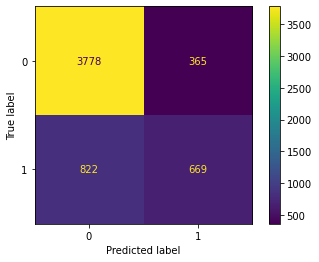



Confusion matrix for the test set
[[952  79]
 [201 177]]


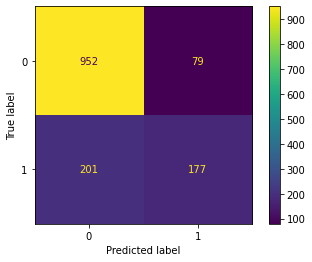

In [28]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label =1),
                                         recall_score(y_train, y_pred_train_log,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 1),
                                        recall_score(y_test, y_pred_test_log,pos_label = 1
                                                    )]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## 02. KNN CLASSIFIER


In [169]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train_mod, y_train)  #X_train_mod is the scaled version

KNeighborsClassifier(n_neighbors=20)

In [170]:
X_train_mod

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.433427,-0.436885,0.463368,0.518185
1,-0.666742,-0.436885,-0.362676,-0.639413
2,0.148198,2.288930,0.639193,0.324807
3,-1.114959,-0.436885,0.679002,-0.820140
4,-1.277947,-0.436885,-1.474021,-0.998111
...,...,...,...,...
5629,1.411355,-0.436885,1.538221,2.312446
5630,0.392680,-0.436885,-1.493926,-0.632470
5631,1.533596,-0.436885,1.382301,2.253468
5632,0.351933,2.288930,1.113588,0.838842


In [171]:
y_train

5305    0
3351    1
5177    1
1460    1
4010    0
       ..
1293    0
4023    0
5200    0
3775    1
1945    0
Name: Churn, Length: 5634, dtype: int64

### Make Predictions on KNN

In [172]:
y_pred_train_knn = neigh.predict(X_train_mod)
y_pred_test_knn = neigh.predict(X_test_mod)

In [173]:
y_pred_train_knn

array([0, 0, 1, ..., 0, 0, 0])

In [174]:
y_pred_test_knn

array([1, 1, 0, ..., 0, 0, 0])

### Confusion matrix on KNN with k=20

,Error_metric,Train,Test
0,Accuracy,0.804224,0.799858
1,Precision,0.708602,0.696721
2,Recall,0.441985,0.449735


Confusion matrix for the train set
[[3872  271]
 [ 832  659]]


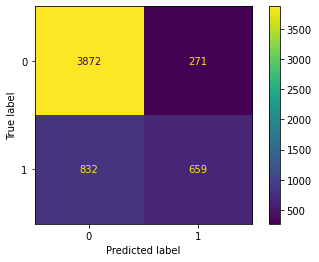



Confusion matrix for the test set
[[957  74]
 [208 170]]


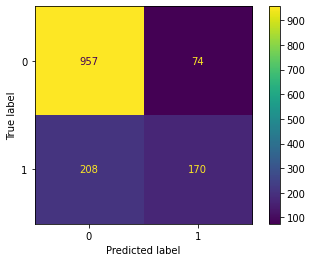

In [175]:
performance_KNN = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 1),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})

display(performance_KNN)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_mod,y_test, values_format = 'd')
plt.show()

In [176]:
# make predictions
y_pred_train_knn = neigh.predict(X_train_mod)
y_pred_test_knn  = neigh.predict(X_test_mod)

#performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
#performance_knn

In [177]:
y_pred_train_knn

array([0, 0, 1, ..., 0, 0, 0])

- Let's make a for loop to try others value for k neighbours

In [178]:
full_knn = pd.DataFrame()

models = {'k': [] }

for k in range(2,30):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_mod, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train_mod)
    y_pred_test_knn  = neigh.predict(X_test_mod)
    temp_knn = pd.DataFrame({'k': [k]*3, 'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 1),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})
    full_knn = pd.concat([full_knn,temp_knn], axis=0)

full_knn

,k,Error_metric,Train,Test
0,2,Accuracy,0.864217,0.766501
1,2,Precision,0.991870,0.638418
2,2,Recall,0.490946,0.298942
0,3,Accuracy,0.862087,0.768630
1,3,Precision,0.784236,0.582278
2,3,Recall,0.660630,0.486772
0,4,Accuracy,0.840966,0.784244
1,4,Precision,0.842348,0.663717
2,4,Recall,0.490946,0.396825
0,5,Accuracy,0.839368,0.781405


In [179]:
### Best accuracy
full_knn[full_knn['Error_metric'] == 'Accuracy']

,k,Error_metric,Train,Test
0,2,Accuracy,0.864217,0.766501
0,3,Accuracy,0.862087,0.768630
0,4,Accuracy,0.840966,0.784244
0,5,Accuracy,0.839368,0.781405
0,6,Accuracy,0.828186,0.779986
0,7,Accuracy,0.827654,0.779276
0,8,Accuracy,0.820021,0.784954
0,9,Accuracy,0.818069,0.788502
0,10,Accuracy,0.812389,0.788502
0,11,Accuracy,0.815229,0.789212


In [180]:
full_knn_2 = full_knn.melt(id_vars=['k','Error_metric'])
full_knn_2

,k,Error_metric,variable,value
0,2,Accuracy,Train,0.864217
1,2,Precision,Train,0.991870
2,2,Recall,Train,0.490946
3,3,Accuracy,Train,0.862087
4,3,Precision,Train,0.784236
5,3,Recall,Train,0.660630
6,4,Accuracy,Train,0.840966
7,4,Precision,Train,0.842348
8,4,Recall,Train,0.490946
9,5,Accuracy,Train,0.839368


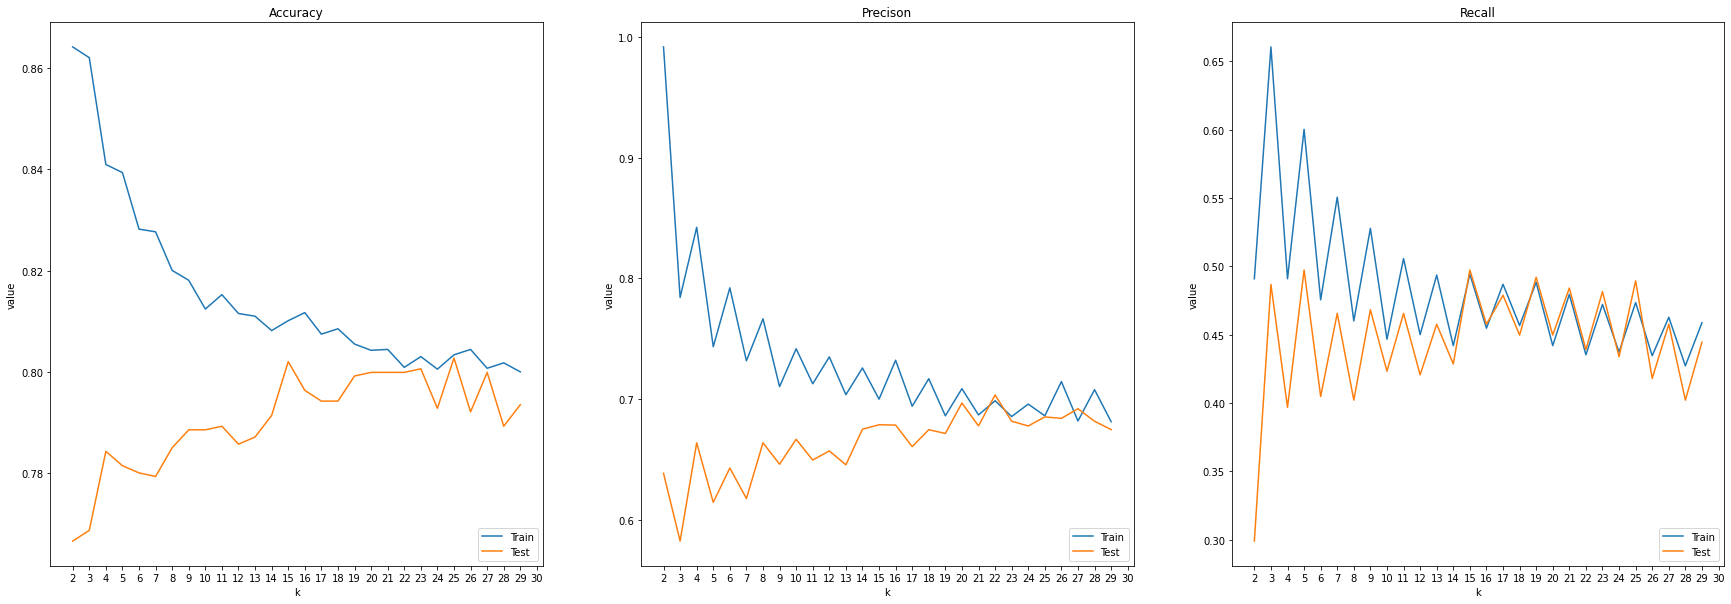

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(1,3, figsize=(30,10))
sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Accuracy'], hue = 'variable', ax = ax[0])
ax[0].set_xticks(range(2,31))
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Precision'], hue = 'variable', ax = ax[1])
ax[1].set_xticks(range(2,31))
ax[1].set_title("Precison")
ax[1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Recall'], hue = 'variable', ax = ax[2])
ax[2].set_xticks(range(2,31))
ax[2].set_title("Recall")
ax[2].legend(loc='lower right')

In [182]:
full_knn_2[full_knn_2['k'] == 20]

,k,Error_metric,variable,value
54,20,Accuracy,Train,0.804224
55,20,Precision,Train,0.708602
56,20,Recall,Train,0.441985
138,20,Accuracy,Test,0.799858
139,20,Precision,Test,0.696721
140,20,Recall,Test,0.449735


In [183]:
full_knn_2[full_knn_2['k'] == 21]

,k,Error_metric,variable,value
57,21,Accuracy,Train,0.804402
58,21,Precision,Train,0.686840
59,21,Recall,Train,0.479544
141,21,Accuracy,Test,0.799858
142,21,Precision,Test,0.677778
143,21,Recall,Test,0.484127


For the moment I'll say 20 k

## 03. DECISION TREE

In [184]:
tree = DecisionTreeClassifier(max_depth=3)

- We don't need to use scaled data

In [185]:
tree.fit(X_train, y_train)

y_pred_train_dt = tree.predict(X_train)
y_pred_test_dt = tree.predict(X_test)


performance_dt = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

In [186]:
display(performance_dt)

,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


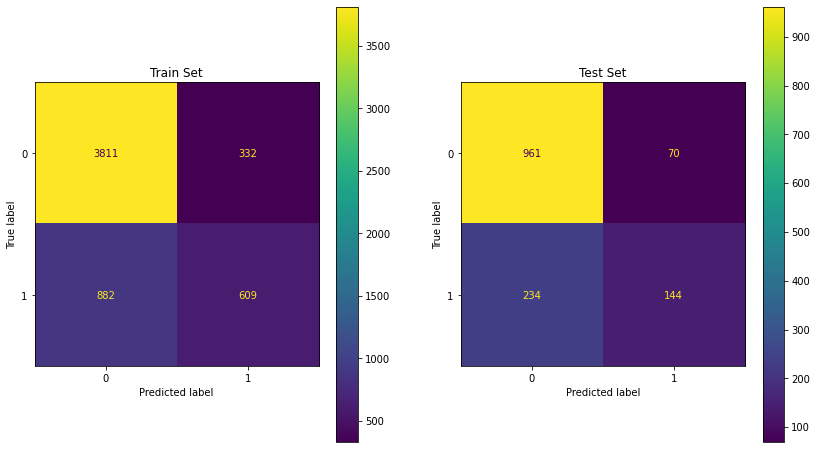

In [187]:
fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(tree,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(tree,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

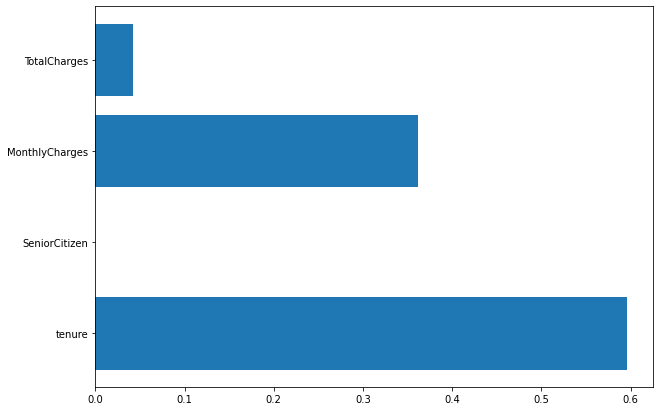

In [188]:
plt.figure(figsize=(10,7))
plt.barh(X.columns,tree.feature_importances_)

In [189]:
X["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

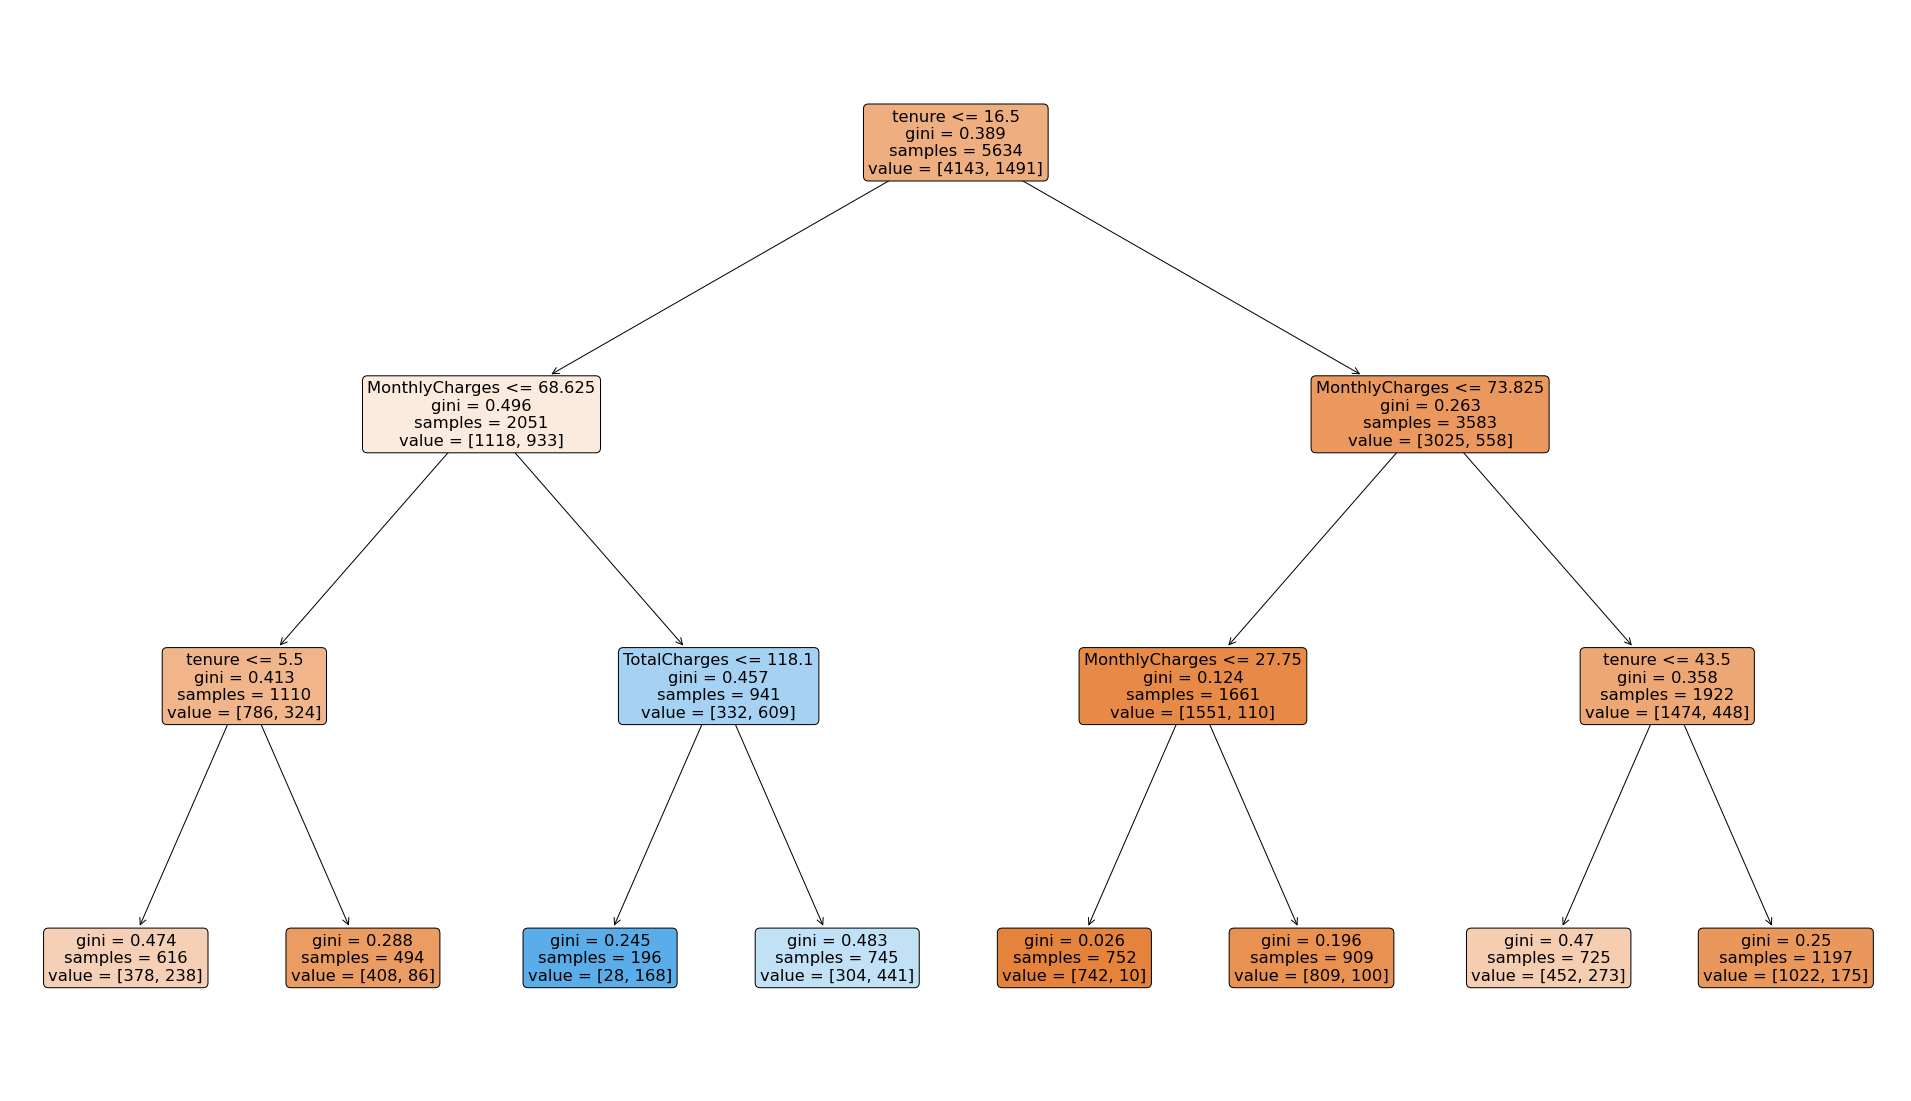

In [190]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(tree,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [191]:
len(X_train)

5634

In [192]:
X_train["tenure"].mean()

32.362974795882145

In [193]:
X_train.describe()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,32.362975,0.160277,64.832384,2284.735739
std,24.543858,0.366895,30.146336,2268.822222
min,0.000000,0.000000,18.250000,18.800000
25%,9.000000,0.000000,35.462500,401.150000
50%,29.000000,0.000000,70.425000,1396.775000
75%,55.000000,0.000000,89.900000,3787.500000
max,72.000000,1.000000,118.750000,8684.800000


We see that senior citizen doesn't affect (feature importance is 0), let's try not include it on the decision tree

In [194]:
performance_log

,Error_metric,Train,Test
0,Accuracy,0.789315,0.801278
1,Precision,0.647002,0.691406
2,Recall,0.448692,0.468254


In [195]:
performance_KNN

,Error_metric,Train,Test
0,Accuracy,0.804224,0.799858
1,Precision,0.708602,0.696721
2,Recall,0.441985,0.449735


In [196]:
performance_dt

,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952
